# Módulo de representação da rede elétrica por meio de árvores de grafos: MyGrid 

MyGrid é uma biblioteca desenvolvida pelo Grupo de Redes Elétricas Inteligentes da Universidade Federal do Ceará para a representação da rede elétrica de distribuição baseada na teoria de grafos em RNP.

MyGrid é software livre disponibilizado no link:

[MyGrid](https://www.github.com/lucassm/MyGrid)

Para instalar basta digitar no terminal o comando:

```shell
git clone https://github.com/lucassm/MyGrid
```

Atualmente apenas redes radiais podem ser representadas.

A biblioteca tem dois módulos principais que são:

- módulo rnp: contém classes que fornecem as funcionalidades para a representação de grafos conforme a teoria de RNP.
- módulo rede: contém classes que fornecem as funcionalidades para a representação da rede elétrica, sob o ponto de vista de RNP de alimentador e RNP de setor.

A estrutura de classes desses módulos está mostrada abaixo:

<img src="Figuras/api_uml.png", width="800"/>

## Utilização do módulo rnp

In [1]:
from mygrid import rnp

As árvores de grafo podem ser representadas por meio de dicionários onde as chaves serão cada um dos nós do grafo e os valores de cada chave serão os nós vizinhos.

Abaixo serão representadas duas árvores de grafos:

In [2]:
# arvore 1
nos1 = {'3': ['1'],
        '1': ['3', '2', '7'],
        '7': ['1', '8', '9', '4'],
        '10': ['5'],
        '4': ['7', '5', '6'],
        '5': ['4', '10'],
        '6': ['4'],
        '9': ['7'],
        '8': ['7'],
        '2': ['1', '11', '12'],
        '11': ['2'],
        '12': ['2', '13'],
        '13': ['12']}

# arvore 2
nos2 = {'14': ['15'],
        '15': ['14', '16', '19'],
        '16': ['15', '17', '18'],
        '17': ['16'],
        '18': ['16'],
        '19': ['15']}

# definição da arvore a1
arv_1 = rnp.Arvore(nos1, dtype=str)

# ordenação da arvore a1
arv_1.ordenar(raiz='1')

# definição da arvore a2
arv_2 = rnp.Arvore(nos2, dtype=str)

# ordenação da arvore a2
arv_2.ordenar(raiz='14')

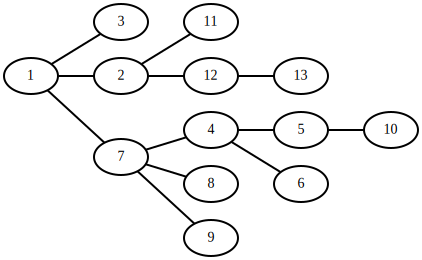

In [3]:
arv_1.show_graph()

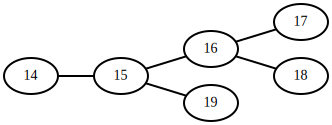

In [4]:
arv_2.show_graph()

Vários métodos estão disponíveis, entre eles:

In [5]:
arv_1.arvore

{'1': ['3', '2', '7'],
 '10': ['5'],
 '11': ['2'],
 '12': ['2', '13'],
 '13': ['12'],
 '2': ['1', '11', '12'],
 '3': ['1'],
 '4': ['7', '5', '6'],
 '5': ['4', '10'],
 '6': ['4'],
 '7': ['1', '8', '9', '4'],
 '8': ['7'],
 '9': ['7']}

In [6]:
arv_1.rnp

array([['0', '1', '1', '2', '2', '3', '1', '2', '2', '2', '3', '4', '3'],
       ['1', '3', '2', '11', '12', '13', '7', '8', '9', '4', '5', '10', '6']], 
      dtype='|S21')

In [7]:
arv_1.rnp_dic()

OrderedDict([('1', '0'),
             ('3', '1'),
             ('2', '1'),
             ('11', '2'),
             ('12', '2'),
             ('13', '3'),
             ('7', '1'),
             ('8', '2'),
             ('9', '2'),
             ('4', '2'),
             ('5', '3'),
             ('10', '4'),
             ('6', '3')])

In [8]:
arv_1.caminho_no_para_no('11', '10')

array([['2', '1', '0', '1', '2', '3', '4'],
       ['11', '2', '1', '7', '4', '5', '10']], 
      dtype='|S21')

In [9]:
arv_1.caminho_no_para_raiz('10')

array([['4', '3', '2', '1', '0'],
       ['10', '5', '4', '7', '1']], 
      dtype='|S21')

## Operações de poda e inserção

Uma das principais funcionalidades do módulo **rnp**, além da representação dos grafos, é apossibilidade das operações de poda e inserção de ramos das árvores, por exemplo, podemos podar o ramo da árvode *arv_1* iniciado pelo nó 4. Veja:

In [10]:
poda = arv_1.podar('4', alterar_rnp=True)
poda

['3' '5']
['4' '10']
['3' '6']


(array([['2', '3', '4', '3'],
        ['4', '5', '10', '6']], 
       dtype='|S21'),
 {'10': ['5'], '4': ['5', '6'], '5': ['4', '10'], '6': ['4']})

A árvore *arv_1* sem o ramo podado,pode ser verificada:

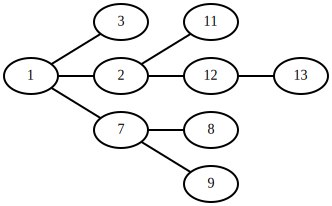

In [11]:
arv_1.show_graph()

A nova estrutura em RNP é dada por:

In [12]:
arv_1.rnp

array([['0', '1', '1', '2', '2', '3', '1', '2', '2'],
       ['1', '3', '2', '11', '12', '13', '7', '8', '9']], 
      dtype='|S21')

É possível então, realizar a inserção do ramo podado da árvore *arv_1* em um dos nós da árvore *arv_2*, por meio do método **inserir_ramo()**. Nesse exemplo iremos inserir o ramo podado no nó 19 e alterar a raiz do ramo podado para o nó 5. Veja:

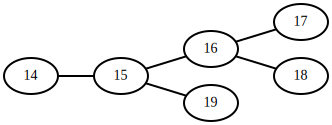

In [13]:
arv_2.show_graph()

In [14]:
arv_2.inserir_ramo('19', poda, '5')

A nova árvore *arv_2*, após a inserção do ramo, fica como mostrado a baixo:

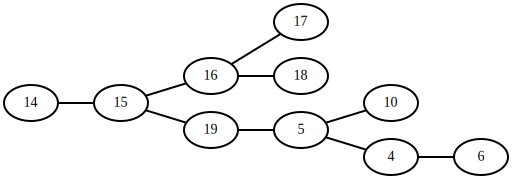

In [15]:
arv_2.show_graph()

In [16]:
arv_2.rnp

array([['0', '1', '2', '3', '3', '2', '3', '4', '5', '4'],
       ['14', '15', '16', '17', '18', '19', '5', '4', '6', '10']], 
      dtype='|S21')

## Utilização do módulo rede

De acordo com o diagrama de classes da biblioteca MyGrid, foram construídas classes que realizam uma abstração dos componentes do sistema de distribuição de energia.

Dessa forma é possível modelar uma rede elétrica de distribuição por meio de classes que representam porções do sistema que utilizam classes primitivas de grafos:

As classes utilizadas são:

- Subestação;
- Alimentador;
- Setor;
- Trecho;
- Chave;
- Transformador;
- NoDeCarga.

In [17]:
from mygrid.rede import Subestacao, Alimentador, Setor, Chave
from mygrid.rede import Trecho, NoDeCarga, Transformador, Condutor
from mygrid.util import Fasor

Com o módulo **rede** é possível modelar a seguinte rede elétrica:

<img src="Figuras/rede_eletrica.png"/>

Essa rede elétrica, na visão de RNP de alimentador, pode ser representada pelos grafo:

<img src="Figuras/grafo_rede_eletrica.png"/>

Com o MyGrid é possível modelar a rede. Veja:

Definição das Chaves

In [18]:
# chaves do alimentador de S1
ch1 = Chave(nome='1', estado=1)
ch2 = Chave(nome='2', estado=1)
ch3 = Chave(nome='3', estado=1)

# chaves de Fronteira
ch4 = Chave(nome='4', estado=0)
ch5 = Chave(nome='5', estado=0)
ch8 = Chave(nome='8', estado=0)

# chaves do alimentador de S2
ch6 = Chave(nome='6', estado=1)
ch7 = Chave(nome='7', estado=1)

Definição dos nós de carga

In [19]:
# Nos de carga do alimentador S1_AL1
s1 = NoDeCarga(nome='S1',
               vizinhos=['A2'],
               potencia=Fasor(real=0.0, imag=0.0, tipo=Fasor.Potencia),
               chaves=['1'])
a1 = NoDeCarga(nome='A1',
               vizinhos=['A2'],
               potencia=Fasor(real=160.0e3, imag=120.0e3, tipo=Fasor.Potencia))
a2 = NoDeCarga(nome='A2',
               vizinhos=['S1', 'A1', 'A3', 'C1'],
               potencia=Fasor(real=150.0e3, imag=110.0e3, tipo=Fasor.Potencia),
               chaves=['1', '3'])
a3 = NoDeCarga(nome='A3',
               vizinhos=['A2', 'B1'],
               potencia=Fasor(real=100.0e3, imag=80.0e3, tipo=Fasor.Potencia),
               chaves=['2'])
b1 = NoDeCarga(nome='B1',
               vizinhos=['B2', 'A3'],
               potencia=Fasor(real=200.0e3, imag=140.0e3, tipo=Fasor.Potencia),
               chaves=['2'])
b2 = NoDeCarga(nome='B2',
               vizinhos=['B1', 'B3', 'E2'],
               potencia=Fasor(real=150.0e3, imag=110.0e3, tipo=Fasor.Potencia),
               chaves=['4'])
b3 = NoDeCarga(nome='B3',
               vizinhos=['B2', 'C3'],
               potencia=Fasor(real=100.0e3, imag=80.0e3, tipo=Fasor.Potencia),
               chaves=['5'])
c1 = NoDeCarga(nome='C1',
               vizinhos=['C2', 'C3', 'A2'],
               potencia=Fasor(real=200.0e3, imag=140.0e3, tipo=Fasor.Potencia),
               chaves=['3'])
c2 = NoDeCarga(nome='C2',
               vizinhos=['C1'],
               potencia=Fasor(real=150.0e3, imag=110.0e3, tipo=Fasor.Potencia))
c3 = NoDeCarga(nome='C3',
               vizinhos=['C1', 'E3', 'B3'],
               potencia=Fasor(real=100.0e3, imag=80.0e3, tipo=Fasor.Potencia),
               chaves=['5', '8'])

# Nos de carga do alimentador S2_AL1
s2 = NoDeCarga(nome='S2',
               vizinhos=['D1'],
               potencia=Fasor(real=0.0, imag=0.0, tipo=Fasor.Potencia),
               chaves=['6'])
d1 = NoDeCarga(nome='D1',
               vizinhos=['S2', 'D2', 'D3', 'E1'],
               potencia=Fasor(real=200.0e3, imag=160.0e3, tipo=Fasor.Potencia),
               chaves=['6', '7'])
d2 = NoDeCarga(nome='D2',
               vizinhos=['D1'],
               potencia=Fasor(real=90.0e3, imag=40.0e3, tipo=Fasor.Potencia))
d3 = NoDeCarga(nome='D3',
               vizinhos=['D1'],
               potencia=Fasor(real=100.0e3, imag=80.0e3, tipo=Fasor.Potencia))
e1 = NoDeCarga(nome='E1',
               vizinhos=['E3', 'E2', 'D1'],
               potencia=Fasor(real=100.0e3, imag=40.0e3, tipo=Fasor.Potencia),
               chaves=['7'])
e2 = NoDeCarga(nome='E2',
               vizinhos=['E1', 'B2'],
               potencia=Fasor(real=110.0e3, imag=70.0e3, tipo=Fasor.Potencia),
               chaves=['4'])
e3 = NoDeCarga(nome='E3',
               vizinhos=['E1', 'C3'],
               potencia=Fasor(real=150.0e3, imag=80.0e3, tipo=Fasor.Potencia),
               chaves=['8'])

Definição dos condutores

In [20]:
cond_1 = Condutor(nome='CAA 266R',
                  rp=0.2391,
                  xp=0.37895,
                  rz=0.41693,
                  xz=1.55591,
                  ampacidade=301)

Definição dos trechos de alimentadores

In [21]:
# Trechos do alimentador S1_AL1
s1_ch1 = Trecho(nome='S1CH1', n1=s1, n2=ch1, condutor=cond_1, comprimento=0.01)

ch1_a2 = Trecho(nome='CH1A2', n1=ch1, n2=a2, condutor=cond_1, comprimento=1.0)
a2_a1 = Trecho(nome='A2A1', n1=a2, n2=a1, condutor=cond_1, comprimento=1.0)
a2_a3 = Trecho(nome='A2A3', n1=a2, n2=a3, condutor=cond_1, comprimento=1.0)
a2_ch3 = Trecho(nome='A2CH3', n1=a2, n2=ch3, condutor=cond_1, comprimento=0.5)
a3_ch2 = Trecho(nome='A3CH2', n1=a3, n2=ch2, condutor=cond_1, comprimento=0.5)

ch3_c1 = Trecho(nome='CH3C1', n1=ch3, n2=c1, condutor=cond_1, comprimento=0.5)
c1_c2 = Trecho(nome='C1C2', n1=c1, n2=c2, condutor=cond_1, comprimento=1.0)
c1_c3 = Trecho(nome='C1C3', n1=c1, n2=c3, condutor=cond_1, comprimento=1.0)
c3_ch8 = Trecho(nome='C3CH8', n1=c3, n2=ch8, condutor=cond_1, comprimento=0.5)
c3_ch5 = Trecho(nome='C3CH5', n1=c3, n2=ch5, condutor=cond_1, comprimento=0.5)

ch2_b1 = Trecho(nome='CH2B1', n1=ch2, n2=b1, condutor=cond_1, comprimento=0.5)
b1_b2 = Trecho(nome='B1B2', n1=b1, n2=b2, condutor=cond_1, comprimento=1.0)
b2_ch4 = Trecho(nome='B2CH4', n1=b2, n2=ch4, condutor=cond_1, comprimento=0.5)
b2_b3 = Trecho(nome='B2B3', n1=b2, n2=b3, condutor=cond_1, comprimento=1.0)
b3_ch5 = Trecho(nome='B3CH5', n1=b3, n2=ch5, condutor=cond_1, comprimento=0.5)

# Trechos do alimentador S2_AL1
s2_ch6 = Trecho(nome='S2CH6', n1=s2, n2=ch6, condutor=cond_1, comprimento=0.01)

ch6_d1 = Trecho(nome='CH6D1', n1=ch6, n2=d1, condutor=cond_1, comprimento=1.0)
d1_d2 = Trecho(nome='D1D2', n1=d1, n2=d2, condutor=cond_1, comprimento=1.0)
d1_d3 = Trecho(nome='D1D3', n1=d1, n2=d3, condutor=cond_1, comprimento=1.0)
d1_ch7 = Trecho(nome='D1CH7', n1=d1, n2=ch7, condutor=cond_1, comprimento=0.5)

ch7_e1 = Trecho(nome='CH7E1', n1=ch7, n2=e1, condutor=cond_1, comprimento=0.5)
e1_e2 = Trecho(nome='E1E2', n1=e1, n2=e2, condutor=cond_1, comprimento=1.0)
e2_ch4 = Trecho(nome='E2CH4', n1=e2, n2=ch4, condutor=cond_1, comprimento=0.5)
e1_e3 = Trecho(nome='E1E3', n1=e1, n2=e3, condutor=cond_1, comprimento=1.0)
e3_ch8 = Trecho(nome='E3CH8', n1=e3, n2=ch8, condutor=cond_1, comprimento=0.5)

Definição dos setores

In [22]:
# Setor S1
st1 = Setor(nome='S1',
            vizinhos=['A'],
            nos_de_carga=[s1])

# setor A
stA = Setor(nome='A',
            vizinhos=['S1', 'B', 'C'],
            nos_de_carga=[a1, a2, a3])

# Setor B
stB = Setor(nome='B',
            vizinhos=['A', 'C', 'E'],
            nos_de_carga=[b1, b2, b3])

# Setor C
stC = Setor(nome='C',
            vizinhos=['A', 'B', 'E'],
            nos_de_carga=[c1, c2, c3])

# Setor S2
st2 = Setor(nome='S2',
            vizinhos=['D'],
            nos_de_carga=[s2])

# Setor D
stD = Setor(nome='D',
            vizinhos=['S2', 'E'],
            nos_de_carga=[d1, d2, d3])

# Setor E
stE = Setor(nome='E',
            vizinhos=['D', 'B', 'C'],
            nos_de_carga=[e1, e2, e3])

No de Carga: S1 vizinhos ['A2']
No de Carga: A1 vizinhos ['A2']
No de Carga: A3 vizinhos ['A2', 'B1']
No de Carga: A2 vizinhos ['S1', 'A1', 'A3', 'C1']
No de Carga: B1 vizinhos ['B2', 'A3']
No de Carga: B2 vizinhos ['B1', 'B3', 'E2']
No de Carga: B3 vizinhos ['B2', 'C3']
No de Carga: C3 vizinhos ['C1', 'E3', 'B3']
No de Carga: C2 vizinhos ['C1']
No de Carga: C1 vizinhos ['C2', 'C3', 'A2']
No de Carga: S2 vizinhos ['D1']
No de Carga: D2 vizinhos ['D1']
No de Carga: D3 vizinhos ['D1']
No de Carga: D1 vizinhos ['S2', 'D2', 'D3', 'E1']
No de Carga: E1 vizinhos ['E3', 'E2', 'D1']
No de Carga: E3 vizinhos ['E1', 'C3']
No de Carga: E2 vizinhos ['E1', 'B2']


Ligação das chaves aos setores

In [23]:
# ligação das chaves com os respectivos setores
ch1.n1 = st1
ch1.n2 = stA

ch2.n1 = stA
ch2.n2 = stB

ch3.n1 = stA
ch3.n2 = stC

ch4.n1 = stB
ch4.n2 = stE

ch5.n1 = stB
ch5.n2 = stC

ch6.n1 = st2
ch6.n2 = stD

ch7.n1 = stD
ch7.n2 = stE

ch8.n1 = stC
ch8.n2 = stE

Definição dos alimentadores

In [24]:
# Alimentador 1 de S1
sub_1_al_1 = Alimentador(nome='S1_AL1',
                         setores=[st1, stA, stB, stC],
                         trechos=[s1_ch1, ch1_a2, a2_a1,
                                  a2_a3, a2_ch3, ch3_c1,
                                  c1_c2, c1_c3, c3_ch5,
                                  c3_ch8, a3_ch2, ch2_b1,
                                  b1_b2, b2_ch4, b2_b3,
                                  b3_ch5],
                         chaves=[ch1, ch2, ch3, ch4, ch5, ch8])

# Alimentador 1 de S2
sub_2_al_1 = Alimentador(nome='S2_AL1',
                         setores=[st2, stD, stE],
                         trechos=[s2_ch6, ch6_d1, d1_d2,
                                  d1_d3, d1_ch7, ch7_e1,
                                  e1_e2, e2_ch4, e1_e3,
                                  e3_ch8],
                         chaves=[ch6, ch7, ch4, ch8])

Setor:  A
Setor Vizinho:  S1
RNP:  [['0' '1' '1']
 ['A2' 'A1' 'A3']]
Setor Vizinho:  C
RNP:  [['0' '1' '1']
 ['A2' 'A1' 'A3']]
Setor Vizinho:  B
RNP:  [['0' '1' '2']
 ['A3' 'A2' 'A1']]
Setor:  S1
Setor Vizinho:  A
RNP:  [['0']
 ['S1']]
Setor:  B
Setor Vizinho:  A
RNP:  [['0' '1' '2']
 ['B1' 'B2' 'B3']]
Setor Vizinho:  C
RNP:  [['0' '1' '2']
 ['B3' 'B2' 'B1']]
Setor Vizinho:  E
RNP:  [['0' '1' '1']
 ['B2' 'B1' 'B3']]
Setor:  C
Setor Vizinho:  A
RNP:  [['0' '1' '1']
 ['C1' 'C2' 'C3']]
Setor Vizinho:  B
RNP:  [['0' '1' '2']
 ['C3' 'C1' 'C2']]
Setor Vizinho:  E
RNP:  [['0' '1' '2']
 ['C3' 'C1' 'C2']]
Setor:  S2
Setor Vizinho:  D
RNP:  [['0']
 ['S2']]
Setor:  E
Setor Vizinho:  C
RNP:  [['0' '1' '2']
 ['E3' 'E1' 'E2']]
Setor Vizinho:  B
RNP:  [['0' '1' '2']
 ['E2' 'E1' 'E3']]
Setor Vizinho:  D
RNP:  [['0' '1' '1']
 ['E1' 'E3' 'E2']]
Setor:  D
Setor Vizinho:  E
RNP:  [['0' '1' '1']
 ['D1' 'D2' 'D3']]
Setor Vizinho:  S2
RNP:  [['0' '1' '1']
 ['D1' 'D2' 'D3']]


Definição de transformadores e subestações

In [25]:
t1 = Transformador(nome='S1_T1',
                   tensao_primario=Fasor(mod=69e3, ang=0.0, tipo=Fasor.Tensao),
                   tensao_secundario=Fasor(mod=13.8e3, ang=0.0, tipo=Fasor.Tensao),
                   potencia=Fasor(mod=10e6, ang=0.0, tipo=Fasor.Potencia),
                   impedancia=Fasor(real=0.5, imag=0.2, tipo=Fasor.Impedancia))

t2 = Transformador(nome='S2_T1',
                   tensao_primario=Fasor(mod=69e3, ang=0.0, tipo=Fasor.Tensao),
                   tensao_secundario=Fasor(mod=13.8e3, ang=0.0, tipo=Fasor.Tensao),
                   potencia=Fasor(mod=10e6, ang=0.0, tipo=Fasor.Potencia),
                   impedancia=Fasor(real=0.5, imag=0.2, tipo=Fasor.Impedancia))

sub_1 = Subestacao(nome='S1', alimentadores=[sub_1_al_1], transformadores=[t1])

sub_2 = Subestacao(nome='S2', alimentadores=[sub_2_al_1], transformadores=[t2])

_subestacoes = {sub_1_al_1.nome: sub_1_al_1, sub_2_al_1.nome: sub_2_al_1}

Ordenação dos alimentadores e geração dos nós de carga

In [26]:
sub_1_al_1.ordenar(raiz='S1')
sub_2_al_1.ordenar(raiz='S2')

sub_1_al_1.gerar_arvore_nos_de_carga()
sub_2_al_1.gerar_arvore_nos_de_carga()

No de Carga: S1 vizinhos ['A2']
No de Carga: A1 vizinhos ['A2']
No de Carga: A3 vizinhos ['A2', 'B1']
No de Carga: A2 vizinhos ['S1', 'A1', 'A3', 'C1']
No de Carga: B1 vizinhos ['B2', 'A3']
No de Carga: B2 vizinhos ['B1', 'B3', 'E2']
No de Carga: B3 vizinhos ['B2', 'C3']
No de Carga: C3 vizinhos ['C1', 'E3', 'B3']
No de Carga: C2 vizinhos ['C1']
No de Carga: C1 vizinhos ['C2', 'C3', 'A2']
No de Carga: S2 vizinhos ['D1']
No de Carga: D2 vizinhos ['D1']
No de Carga: D3 vizinhos ['D1']
No de Carga: D1 vizinhos ['S2', 'D2', 'D3', 'E1']
No de Carga: E1 vizinhos ['E3', 'E2', 'D1']
No de Carga: E3 vizinhos ['E1', 'C3']
No de Carga: E2 vizinhos ['E1', 'B2']


## Utilização dos métodos do módulo rede

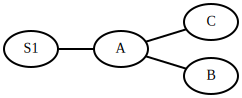

In [27]:
sub_1_al_1.show_graph()

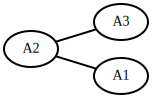

In [28]:
stA.show_graph()

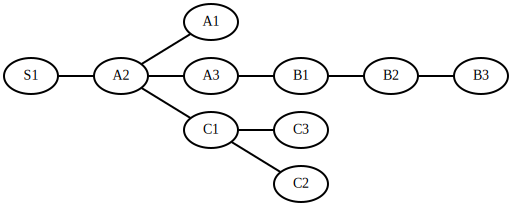

In [29]:
sub_1_al_1.arvore_nos_de_carga.show_graph()

Poda e inserção são realizadas da mesma forma:

In [30]:
poda = sub_1_al_1.podar('B', alterar_rnp=True)

['4' 'B2']
['5' 'B3']


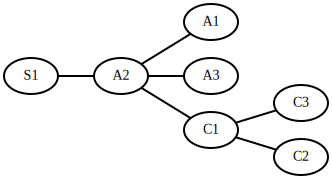

In [31]:
sub_1_al_1.arvore_nos_de_carga.show_graph()

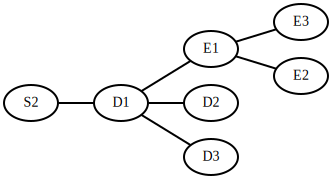

In [32]:
sub_2_al_1.arvore_nos_de_carga.show_graph()

In [34]:
sub_2_al_1.inserir_ramo('E', poda, 'B')

No de Carga: S2 vizinhos ['D1']
No de Carga: D2 vizinhos ['D1']
No de Carga: D3 vizinhos ['D1']
No de Carga: D1 vizinhos ['S2', 'D2', 'D3', 'E1']
No de Carga: E1 vizinhos ['E3', 'E2', 'D1']
No de Carga: E3 vizinhos ['E1', 'C3']
No de Carga: E2 vizinhos ['E1', 'B2']
No de Carga: B1 vizinhos ['B2', 'A3']
No de Carga: B2 vizinhos ['B1', 'B3', 'E2']
No de Carga: B3 vizinhos ['B2', 'C3']


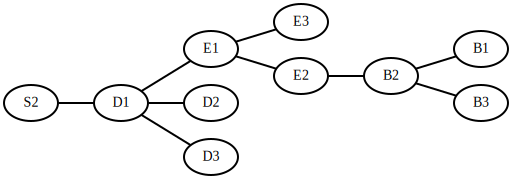

In [35]:
sub_2_al_1.arvore_nos_de_carga.show_graph()

## Execução de fluxo de carga

A biblioteca MyGrid fornece um módulo para cálculo do fluxo de carga em redes radiais, conhecido como varredura direta/inversa.

Na fase de varredura direta as tensões são calculadas. Na primeira varredura, a tensão na barra da subestação é atribuída para todos os nós.

Na fase de varredura inversa, os fluxos de corrente são calculados em cada um dos trechos.

<img src="Figuras/fluxo.png" width="600"/>

In [39]:
from mygrid.fluxo_de_carga import varred_dir_inv

In [40]:
varred_dir_inv.calcular_fluxo_de_carga(sub_1)

Varredura no alimentador S1_AL1
-------------------------
Iteração: 1
Tensao do no A2: 13.7999672002
Tensao do no C1: 13.7999503416
Tensao do no A1: 13.7999611328
Tensao do no A3: 13.7999632708
Tensao do no C2: 13.799944722
Tensao do no C3: 13.7999464121
Max. diferença de tensões: 0.0319147668351
-------------------------
Iteração: 2
Tensao do no A2: 13.7999672002
Tensao do no C1: 13.7999503416
Tensao do no A1: 13.7999611328
Tensao do no A3: 13.7999632708
Tensao do no C2: 13.799944722
Tensao do no C3: 13.7999464121
Max. diferença de tensões: 9.09494701773e-13


In [41]:
c3.tensao.mod

13799.946412118386

In [42]:
c3.tensao.ang

-8.5743223519664687e-05

In [43]:
c1_c3.fluxo.mod

5.3577677254361165

## Script de Análise de fluxo de carga utilizando MyGrid

In [44]:
from terminaltables import AsciiTable


def exibir_fluxos(sub):

    for al in sub.alimentadores.values():
        list_dados = [['trecho',
                        'condutor',
                        'comprimento (km)',
                        'ampacidade (A)',
                        'corrente (A)']]
        for tr in al.trechos.values():
            tr_dados = [tr.nome,
                        tr.condutor.nome,
                        str(tr.comprimento),
                        str(tr.condutor.ampacidade),
                        str(round(tr.fluxo.mod, 4))]
                        # ' /' + str(round(tr.fluxo.ang, 4))]
            list_dados.append(tr_dados)
        tab = AsciiTable(list_dados)
        print 'Alimentador %s' % al.nome
        print tab.table

In [45]:
exibir_fluxos(sub_1)

Alimentador S1_AL1
+--------+----------+------------------+----------------+--------------+
| trecho | condutor | comprimento (km) | ampacidade (A) | corrente (A) |
+--------+----------+------------------+----------------+--------------+
| A2A3   | CAA 266R | 1.0              | 301.0          | 5.3578       |
| A2A1   | CAA 266R | 1.0              | 301.0          | 8.3674       |
| A3CH2  | CAA 266R | 0.5              | 301.0          | 0.0          |
| CH3C1  | CAA 266R | 0.5              | 301.0          | 23.3465      |
| C3CH8  | CAA 266R | 0.5              | 301.0          | 0.0          |
| CH1A2  | CAA 266R | 1.0              | 301.0          | 44.8497      |
| C1C3   | CAA 266R | 1.0              | 301.0          | 5.3578       |
| C1C2   | CAA 266R | 1.0              | 301.0          | 7.7822       |
| C3CH5  | CAA 266R | 0.5              | 301.0          | 0.0          |
| A2CH3  | CAA 266R | 0.5              | 301.0          | 23.3465      |
| S1CH1  | CAA 266R | 0.01      

In [46]:
def exibir_cargas(sub):
    for al in sub.alimentadores.values():
        list_dados = [['no de carga',
                       'tensao (kV)',
                       'potencia aparente (kVA)',
                       'potencia ativa (kW)',
                       'potencia reativa (kVar)']]
        for no in al.nos_de_carga.values():
            no_dados = [no.nome,
                        str(round(no.tensao.mod / 1e3, 4)),
                        str(round(no.potencia.mod / 1e3, 4)),
                        str(round(no.potencia.real / 1e3, 4)),
                        str(round(no.potencia.imag / 1e3, 4))]
            list_dados.append(no_dados)
        tab = AsciiTable(list_dados)
        print 'Alimentador %s' % al.nome
        print tab.table

In [47]:
exibir_cargas(sub_1)

Alimentador S1_AL1
+-------------+-------------+-------------------------+---------------------+-------------------------+
| no de carga | tensao (kV) | potencia aparente (kVA) | potencia ativa (kW) | potencia reativa (kVar) |
+-------------+-------------+-------------------------+---------------------+-------------------------+
| S1          | 13.8        | 0.0                     | 0.0                 | 0.0                     |
| A1          | 13.8        | 200.0                   | 160.0               | 120.0                   |
| A3          | 13.8        | 128.0625                | 100.0               | 80.0                    |
| A2          | 13.8        | 186.0108                | 150.0               | 110.0                   |
| C3          | 13.7999     | 128.0625                | 100.0               | 80.0                    |
| C2          | 13.7999     | 186.0108                | 150.0               | 110.0                   |
| C1          | 13.8        | 244.1311       

## Análise de Curto-circuito utilizando MyGrid

In [49]:
from mygrid.curto_circuito import componentes_simetricas

In [50]:
componentes_simetricas.config_objects(sub_1)

In [51]:
componentes_simetricas.calculacurto(sub_1, 'monofasico')

+----------------+---------------+---------------+
| Trecho 1fasico | Curto pu      | Curto A       |
+----------------+---------------+---------------+
| A2A3           | 11.4569823348 | 4793.25495299 |
| A2A1           | 11.4569823348 | 4793.25495299 |
| A3CH2          | 9.17471493747 | 3838.42328905 |
| CH3C1          | 11.4569823348 | 4793.25495299 |
| C3CH8          | 6.5608360379  | 2744.85540043 |
| CH1A2          | 22.800529201  | 9539.05193615 |
| C1C3           | 7.65067591131 | 3200.81144701 |
| C1C2           | 7.65067591131 | 3200.81144701 |
| C3CH5          | 6.5608360379  | 2744.85540043 |
| A2CH3          | 15.2506850947 | 6380.42546722 |
| S1CH1          | 2302.8534493  | 963444.245551 |
+----------------+---------------+---------------+


## Utilização de XML para entrada de dados

Também existe a possibilidade de entrada de dados utilizando arquivo de dados xml.

<img src='Figuras/xml2objects.png'/>

O código em xml deve ter a seguinte estrutura:

```xml
<rede>
    <elementos>
        <chave/>...
        <no/>...
        <setor/>...
        <alimentador/>...
        <transformador/>
        <subestacao/>...
    </elementos>
    <topologia>
        <elemento tipo="chave"/>
        <elemento tipo="no"/>
        <elemento tipo="setor"/>
        <elemento tipo="alimentador"/>
        <elemento tipo="transformador">
        <elemento tipo="subestacao"/>
    </topologia>
</rede>
```

In [52]:
from xml2objects import carregar_topologia

In [53]:
top = carregar_topologia()

Gerando chaves...
Chave 1 criada.
Chave 2 criada.
Chave 3 criada.
Chave 4 criada.
Chave 5 criada.
Chave 6 criada.
Chave 7 criada.
Chave 8 criada.
Chave 9 criada.
Chave 10 criada.
Chave 11 criada.
Chave 12 criada.
Chave 13 criada.
Gerando Nos de Carga...
NoDeCarga S1 criado.
NoDeCarga A1 criado.
NoDeCarga A2 criado.
NoDeCarga A3 criado.
NoDeCarga B1 criado.
NoDeCarga B2 criado.
NoDeCarga C1 criado.
NoDeCarga C2 criado.
NoDeCarga C3 criado.
NoDeCarga F1 criado.
NoDeCarga F2 criado.
NoDeCarga F3 criado.
NoDeCarga G1 criado.
NoDeCarga G2 criado.
NoDeCarga H1 criado.
NoDeCarga H2 criado.
NoDeCarga I1 criado.
NoDeCarga I2 criado.
NoDeCarga I3 criado.
NoDeCarga S2 criado.
NoDeCarga D1 criado.
NoDeCarga D2 criado.
NoDeCarga E1 criado.
NoDeCarga E2 criado.
NoDeCarga E3 criado.
Gerando Setores...
No de Carga: S1 vizinhos ['A2', 'G1']
Setor S1 criado.
No de Carga: A1 vizinhos ['A2']
No de Carga: A3 vizinhos ['A2', 'B1']
No de Carga: A2 vizinhos ['S1', 'A1', 'A3', 'C1']
Setor A criado.
No de Carga

In [54]:
top

{'alimentadores': {'S1_AL1': <mygrid.rede.Alimentador at 0x7f27b2ead2d0>,
  'S1_AL2': <mygrid.rede.Alimentador at 0x7f27b2ead4d0>,
  'S2_AL1': <mygrid.rede.Alimentador at 0x7f27b2ead650>},
 'chaves': {'1': <mygrid.rede.Chave at 0x7f27b2e9c0d0>,
  '10': <mygrid.rede.Chave at 0x7f27b2e9c310>,
  '11': <mygrid.rede.Chave at 0x7f27b2e9c350>,
  '12': <mygrid.rede.Chave at 0x7f27b2e9c390>,
  '13': <mygrid.rede.Chave at 0x7f27b2e9c3d0>,
  '2': <mygrid.rede.Chave at 0x7f27b2e9c110>,
  '3': <mygrid.rede.Chave at 0x7f27b2e9c150>,
  '4': <mygrid.rede.Chave at 0x7f27b2e9c190>,
  '5': <mygrid.rede.Chave at 0x7f27b2e9c1d0>,
  '6': <mygrid.rede.Chave at 0x7f27b2e9c210>,
  '7': <mygrid.rede.Chave at 0x7f27b2e9c250>,
  '8': <mygrid.rede.Chave at 0x7f27b2e9c290>,
  '9': <mygrid.rede.Chave at 0x7f27b2e9c2d0>},
 'comunicacao': {'1': Comunicacao(nome='1', ip='localhost', porta='5001'),
  '10': Comunicacao(nome='10', ip='localhost', porta='5010'),
  '11': Comunicacao(nome='11', ip='localhost', porta='5011'),

In [56]:
top['alimentadores']['S1_AL1']